<a href="https://colab.research.google.com/github/QuratulAin20/LLM-from-scratch/blob/main/LLM_from_Scratch_Stage_2(attention_mechanism).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Why use attention mechanism if we already have algorithms to deal with sequential data?

 We can use RNN,LSTM AND GRU for sequential data but they have a limitation in memory cell. \

🧠 Why Attention is Needed
Traditional RNNs, LSTMs, and GRUs compress all input info into a fixed-size hidden state. This makes them struggle with long or complex sequences.
>🔍 Attention solves this by letting the model focus on relevant parts of the input dynamically at each output step.


Here's a concise comparison chart showing the **differences between RNN, LSTM, GRU**

---

### 🔄 Comparison Chart

| Feature / Model         | **RNN**                             | **LSTM**                                  | **GRU**                                   | **Attention Mechanism**                                |
|-------------------------|-------------------------------------|--------------------------------------------|--------------------------------------------|--------------------------------------------------------|
| **Memory Type**         | Short-term                          | Long-term (via cell state)                 | Long-term (simplified version of LSTM)     | Dynamic memory across all sequence elements           |
| **Vanishing Gradient**  | High risk                           | Handles well                               | Handles well                               | Not applicable (complements RNNs)                     |
| **Gates**               | None                                | 3 gates: input, forget, output             | 2 gates: update, reset                     | No gates; uses alignment scores                       |
| **Complexity**          | Low                                 | High                                       | Medium                                     | Adds overhead but improves performance                |
| **Speed**               | Fast                                | Slower (more parameters)                   | Faster than LSTM                           | Depends on implementation (slower without optimization) |
| **Long-Term Dependency**| Poor                                | Good                                       | Good                                       | Excellent                                             |
| **Best Use Case**       | Simple sequential data              | Complex long sequences (e.g., language)    | Faster training with similar performance   | Machine translation, summarization, Q&A               |



The **Recurrent Neural Network (RNN)** is a class of neural networks specifically designed for **sequential data**. Unlike traditional feedforward neural networks, RNNs have **loops** that allow information to persist across steps in a sequence, making them ideal for tasks involving **time-series data**, **natural language processing**, and **speech recognition**.

---

### 🔧 **Specification of RNN:**

| **Feature**                  | **Specification** |
|-----------------------------|--------------------|
| **Architecture**            | Input Layer → Hidden Layers (with recurrent connections) → Output Layer |
| **Memory**                  | Short-term memory (retains past input using hidden states) |
| **Activation Functions**    | `tanh`, `sigmoid`, or `ReLU` (typically `tanh` in hidden layer) |
| **Loss Functions**          | Depends on the task: <br> - **Cross-Entropy** for classification <br> - **MSE (Mean Squared Error)** for regression |
| **Backpropagation**         | Uses **Backpropagation Through Time (BPTT)** |
| **Input Format**            | Sequential data (e.g., text, time series) often in shape: `(sequence_length, batch_size, input_size)` |
| **Output Format**           | - One-to-one (e.g., sentiment classification) <br> - One-to-many (e.g., text generation) <br> - Many-to-one (e.g., sequence classification) <br> - Many-to-many (e.g., translation) |
| **Challenges**              | - **Vanishing gradients** <br> - Difficulty learning long-term dependencies |
| **Improvements**            | LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) address RNN limitations |
| **Common Applications**     | - Text generation <br> - Speech recognition <br> - Language modeling <br> - Time series prediction |

image.png

# STAGE 2 OF OUR BUILDING LLM i.e Building attention mechanism architecture

- Before the transformer the RNN is the best choice to build machine translation, where encoder take the sequence of input of source as an input and hidden state of the encoder encodes a compressed representation of the entire input sequenc. Thus the decoder uses its current hidden state to begin the translation token by token.

- In attention mechanism the text generating decoder can access all input token selectively. This mean some input token has more important than other in order to generate output by assigning the attention weights.
Any time we query it will refer to whole text.
>The goal of attention is to compute the context vector for each input elements that combine information of all other input element

### 3.3.1 A simple self-attention mechanism without trainable weights

>Our Goal is to create a context vector of our input for that invovle multiple steps\
we have intermediate weights or initial weights but we donot know how to compute those.

**STEP1 Compute unnormalized attention score (omega)**

```
# This is formatted as code
```


1. first we calculate attention score(or unnormalized attention score) a step toward calculating attention weights(normalized attention score).

How do we calculate the attention score?
we compute the unnormalized attention scores via dot products
Suppose we use the second input token as the query, that is,
q2 = x2.
- we take a dot product of query vector to each input vector as
omega21 = q2*x1T
omega22 = q2*x2T
omega23 = q2*x3T
------

*Greek letter "omega" used to symbolize the unnormalized attention scores*

-------
**By convention, the unnormalized attention weights are referred to as "attention scores" whereas the normalized attention scores, which sum to 1, are referred to as "attention weights"**

In [ ]:
from importlib.metadata import version

print("torch version:", version("torch"))

torch version: 2.6.0+cu124


In [1]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
#3-dimension vector embedding Each input token (like "Your", "journey", etc.) is represented by a vector of 3 dimensions. So, the embedding size or hidden size is 3.

In [ ]:
print(inputs.shape)


torch.Size([6, 3])


6 = number of tokens (sequence length)

3 = size of each embedding vector



In [ ]:
query = inputs[1]
query

tensor([0.5500, 0.8700, 0.6600])

In [ ]:
query = inputs[1]  # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0]) # to save new tensor
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)(dot product to search similarity sore)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


### 📦 **Context**
The code is calculating **attention scores** between a **query** and a list of **input vectors**, using **dot product attention**.

---

### 🧠 **Code Breakdown**
```python
query = inputs[1]  # 2nd input token is the query
```
- `inputs` is assumed to be a 2D tensor of shape `(sequence_length, hidden_size)`.
- `inputs[1]` selects the **second input vector** in the sequence, which is used as the **query**.

---

```python
attn_scores_2 = torch.empty(inputs.shape[0])
```
- Initializes an empty 1D tensor to store **attention scores**.
- Shape is `(sequence_length,)`, meaning one score for each token in the input sequence.

---

```python
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)  # dot product
```
- Iterates over each token vector `x_i` in the input sequence.
- Computes the **dot product** between the current token `x_i` and the **query**.
- Stores this scalar score in `attn_scores_2[i]`.

📌 Dot product gives a **similarity score**—the higher it is, the more similar the token is to the query.

---

```python
print(attn_scores_2)
```
- Prints the final vector of attention scores.

---

### 🔍 **Example:**
Imagine `inputs` contains 5 token embeddings (each of size 3), and the second one is used as the **query**.  
You're computing how similar each token is to the second token.

---

### 💡 **Why No Transpose?**
Since both `x_i` and `query` are 1D vectors (same size), `torch.dot` directly computes the inner product without needing a transpose.

---

### ✅ Summary:
This code implements **dot-product attention** (without softmax) where:
- Query = 2nd token
- Key = All tokens
- Value = Not used here
- Output = Attention scores representing relevance of each token to the query

Any activation function like`softmax` is not used

In [ ]:
# we can also compute dot product of query to each input element as
print(torch.dot(query,inputs[0])) #dot product of query to input element1
print(torch.dot(query,inputs[1])) #dot product of query to input element2
print(torch.dot(query,inputs[2])) ##dot product of query to input element3
print(torch.dot(query,inputs[3])) # #dot product of query to input element4
print(torch.dot(query,inputs[4])) #dot product of query to input element5
print(torch.dot(query,inputs[5])) #dot product of query to input element6

tensor(0.9544)
tensor(1.4950)
tensor(1.4754)
tensor(0.8434)
tensor(0.7070)
tensor(1.0865)


**Step 2 normalize the unnormalized attention scores ("omegas",
) so that they sum up to 1 and get attention weights**

Here is a simple way to normalize the unnormalized attention scores to sum up to 1 (a convention, useful for interpretation, and important for training stability)

However, in practice, using the softmax function for normalization, which is better at handling extreme values and has more desirable gradient properties during training, is common and recommended.[link text](https://)

In [ ]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


Here's a naive implementation of a softmax function for scaling, which also normalizes the vector elements such that they sum up to 1:

In [ ]:
# defining our own softmax function (not recommended) use pytorch function of softmax
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [ ]:
# pytorch softmax function RECOMMNEDED ONE
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


Next step is to calculate the context vector

HOW?

multiply each input vector to attention weights and then sum up all vectors to get context vector
- Higher value of attention weight more important

**Step 3: compute the context vector**

- By multiplying the embedded input tokens,
 with the attention weights and sum the resulting vectors

image.png

In [ ]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


# 3.3.2 Computing attention weights for all input tokens

Generalize to all input sequence tokens:

Above, we computed the attention weights and context vector for input 2 (as illustrated in the highlighted row in the figure below)

Next, we are generalizing this computation to compute all attention weights and context vectors


image.png

In self-attention, the process starts with the calculation of attention scores, which are subsequently normalized to derive attention weights that total 1.

These attention weights are then utilized to generate the context vectors through a weighted summation of the inputs

image.png

- Apply previous step 1 to all pairwise elements to compute the unnormalized attention score matrix:

In [ ]:
#Method 1: Manual Dot Product (Nested Loops)
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
# Method 2: Vectorized Matrix Multiplication
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


You're computing the **attention scores** in two different but equivalent ways:

---

### 🧠 Goal: Calculate self-attention scores

For a sequence of input vectors (like word embeddings), self-attention starts by computing **how much each token should attend to every other token**. One basic way to do this is via **dot product attention**.

---

## 🔁 Method 1: Manual Dot Product (Nested Loops)
```python
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)
```

### ✅ What’s happening here:
- `inputs` is a tensor with 6 vectors (assumed shape `(6, hidden_dim)`).
- You're iterating over each pair of vectors `(x_i, x_j)` and calculating their dot product manually using `torch.dot()`.
- You store the result in the matrix `attn_scores[i, j]`.

This gives you a `(6, 6)` matrix where each value is the similarity between two tokens.

---

## ⚡ Method 2: Vectorized Matrix Multiplication
```python
attn_scores = inputs @ inputs.T
print(attn_scores)
```

### ✅ What’s happening here:
- `@` is shorthand for matrix multiplication.
- `inputs @ inputs.T` does the exact same thing as the nested loops, just **much faster** and more efficient using PyTorch's backend.

### Why does this work?
If:
- `inputs` is shape `(6, hidden_dim)`
- Then `inputs.T` is `(hidden_dim, 6)`
- So, `inputs @ inputs.T` results in a `(6, 6)` matrix, where each element `[i, j]` is the dot product of `inputs[i]` and `inputs[j]`

---

## ✅ So what’s the difference?

| Method            | Pros                             | Cons                           |
|------------------|----------------------------------|--------------------------------|
| Loop version      | Easy to understand and debug     | Slow and not scalable          |
| Matrix version    | Super fast and optimized         | Harder to read at first glance |

---

### 🔍 Summary

Both compute the same **self-attention score matrix**, where:
- Each entry `attn_scores[i][j]` is the **dot product similarity** between token `i` and token `j`.

This is the **raw score** before applying softmax to get attention weights.

In [ ]:
# applying softmax
# Similar to step 2 previously, we normalize each row so that the values in each row sum to 1:

attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [ ]:
#Quick verification that the values in each row indeed sum to 1

row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)

print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [ ]:
#Apply previous step 3 to compute all context vectors:

all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# 3.4 Implementing self-attention with trainable weights

In this section, we are implementing the self-attention mechanism that is used in the original transformer architecture, the GPT models, and most other popular LLMs.

This self-attention mechanism is also called "scaled dot-product attention"

The overall idea is similar to before:
- We want to compute context vectors as weighted sums over the input vectors specific to a certain input element
- For the above, we need attention weights
- As you will see, there are only slight differences compared to the basic attention mechanism introduced earlier:
- The most notable difference is the introduction of weight matrices that are updated during model training
- These trainable weight matrices are crucial so that the model (specifically, the attention module inside the model) can learn to produce "good" context vectors.

image.png

Implementing the self-attention mechanism step by step, we will start by introducing the three training weight matrices
Wq,Wk and Wv

These three matrices are used to project the embedded input tokens,
, into query, key, and value vectors via matrix multiplication:

Query vector: q(i) = Wq * Xi
Key vector: k(i) = Wk * Xi
Value vector: v(i) = Wv * Xi

The embedding dimensions of the input and the query vector
 can be the same or different, depending on the model's design and specific implementation
In GPT models, the input and output dimensions are usually the same, but for illustration purposes, to better follow the computation, we choose different input and output dimensions here:

In [8]:
x_2 = inputs[1] # second input element
d_in = inputs.shape[1] # the input embedding size, d=3
d_out = 2 # the output embedding size, d=2

Below, we initialize the three weight matrices; note that we are setting requires_grad=False to reduce clutter in the outputs for illustration purposes, but if we were to use the weight matrices for model training, we would set requires_grad=True to update these matrices during model training

In [9]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

--------------
Let's break this code down line-by-line and explain what's happening, especially in the context of PyTorch.

🔢 torch.manual_seed(123)
This sets the random seed for PyTorch.
By fixing the seed (here 123), you ensure that any random numbers generated (like the weights below) will be the same each time you run the code — useful for reproducibility and debugging.

🧠 Learnable Weights: Queries, Keys, and Values



```
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

```
are creating weight matrices used in the attention mechanism (specifically in transformers).

Let’s explain what each part is doing:

✅ torch.rand(d_in, d_out)
Generates a tensor of shape (d_in, d_out) filled with random values from a uniform distribution between [0, 1).

✅ torch.nn.Parameter(...)
Wraps the tensor as a Parameter, which tells PyTorch that this tensor is part of a model's parameters and should (typically) be updated during training.

But...

🚫 requires_grad=False
By setting requires_grad=False, you're telling PyTorch not to compute gradients for these parameters — so they won't be updated during backpropagation.

Normally, requires_grad=True is the default for nn.Parameter, but here it's turned off, possibly because you're testing or using fixed weights.

💡 What are W_query, W_key, W_value?

In transformers and attention mechanisms, we compute:

Query = Input × W_query

Key = Input × W_key

Value = Input × W_value

These are used to compute attention scores and weighted values in the self-attention process.

Each of these matrices transforms the input features (d_in) into a new space (d_out) for each of Q, K, and V.


In [10]:
#Next we compute the query, key, and value vectors:

query_2 = x_2 @ W_query # _2 because it's with respect to the 2nd input element
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4306, 1.4551])


As we can see below, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space:

In [11]:
keys = inputs @ W_key
values = inputs @ W_value

print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


we are taking an inputs tensor (data) and multiplying it by weight matrices W_key and W_value to produce the key and value representations used in attention

In [12]:
# STEP2 we compute the unnormalized attention scores by computing the dot product between the query and each key vector
keys_2 = keys[1] # Python starts index at 0
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)



tensor(1.8524)


### STEP2

image.png

In [13]:
#Since we have 6 inputs, we have 6 attention scores for the given query vector:

attn_scores_2 = query_2 @ keys.T # All attention scores for given query
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


image.png

# STEP3

Next, in step 3, we compute the attention weights (normalized attention scores that sum up to 1) using the softmax function we used earlier
The difference to earlier is that we now scale the attention scores by dividing them by the square root of the embedding dimension,
 (i.e.sr(dk), d_k**0.5)

In [14]:
d_k = keys.shape[1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


image.png

- In the above step we calculated the attention weights now its time to calculate the context vector i.e attention weights to value not input to values.

- Query and Key is involve in calculate the attention score and value is ivnovle in calculating the context vector by multiplying it with attention weights.



In [15]:
# In step 4, we now compute the context vector for input query vector 2

context_vec_2 = attn_weights_2 @ values  #@ metrix multiplication
print(context_vec_2)

tensor([0.3061, 0.8210])


### In the next section we will compute the context vector of all the input not only 2

# 3.4.2 Implementing a compact SelfAttention class

In [16]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        context_vec = attn_weights @ values
        return context_vec

torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


- we get the context vector

In [ ]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

image.png

# better approach use pytorch linear layer

We can streamline the implementation above using PyTorch's Linear layers, which are equivalent to a matrix multiplication if we disable the bias units.

Another big advantage of using nn.Linear over our manual nn.Parameter(torch.rand(...) approach is that nn.Linear has a preferred weight initialization scheme, which leads to more stable model training

In [17]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they use different initial weights for the weight matrices

# here our machine of llm i.e self attention is completed

# Other methods of training using casual mask and dropout mask
**Casual Masking** `where model only depend upon previous word to predict the next`

**Dropoff Masking** `Masking additional attention weights with dropout to reduce overfitting`



### 3.5 Hiding future words with causal attention

In causal attention, the attention weights above the diagonal are masked, ensuring that for any given input, the LLM is unable to utilize future tokens while calculating the context vectors with the attention weight

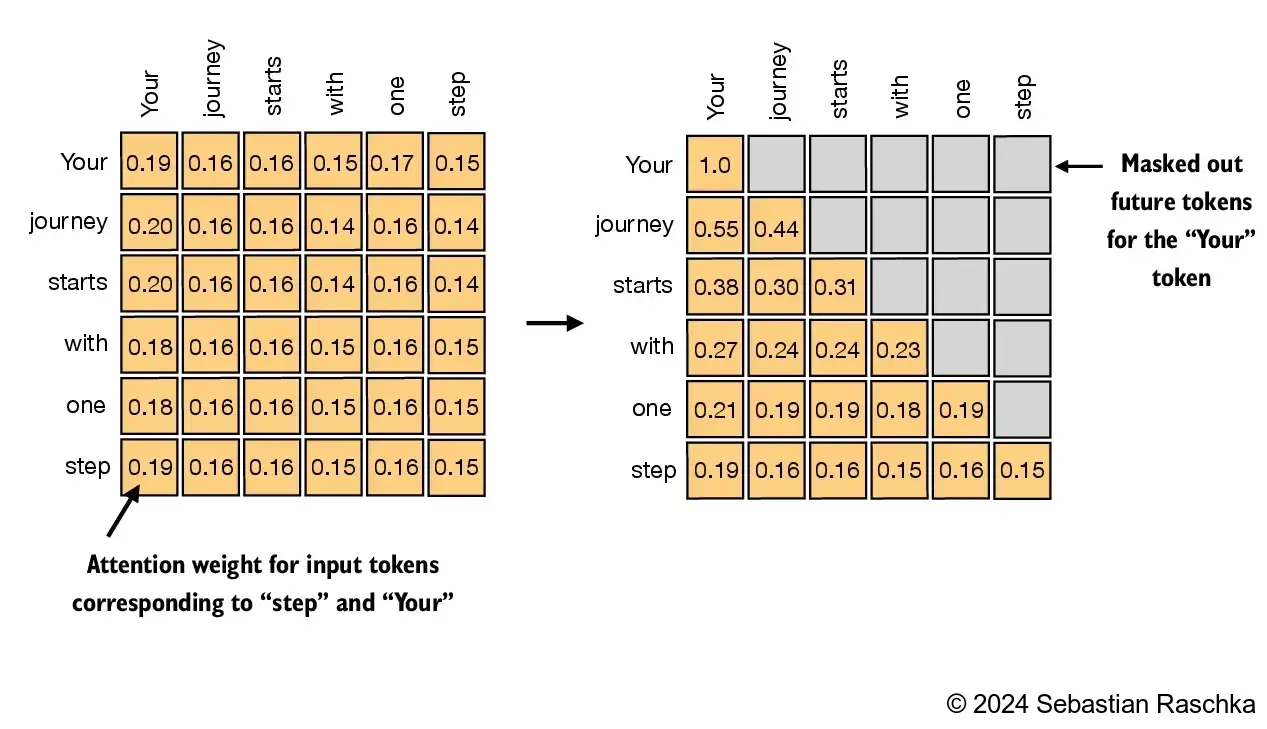

- In this section, we are converting the previous self-attention mechanism into a causal self-attention mechanism.

- `Causal self-attention ensures that the model's prediction for a certain position in a sequence is only dependent on the known outputs at previous positions, not on future positions.`

- In simpler words, this ensures that each next word prediction should only depend on the preceding words.

To achieve this, for each given token, we mask out the future tokens (the ones that come after the current token in the input text)

image.png

To illustrate and implement causal self-attention, let's work with the attention scores and weights from the previous section:

In [ ]:
# Reuse the query and key weight matrices of the
# SelfAttention_v2 object from the previous section for convenience
# Query and Key Projections
queries = sa_v2.W_query(inputs)  # converting inputs into queries
keys = sa_v2.W_key(inputs)   # converting input into keys
attn_scores = queries @ keys.T # calculating attention score i.e Similarity scores

attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)     #Convert scores into weights and normalize
print(attn_weights)

#Reason: Scaling helps stabilize gradients during training — introduced in the original Transformer paper

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


Here, sa_v2 is likely an instance of a class (e.g. SelfAttention_v2) that contains learnable linear transformations for W_query and W_key

----------
The simplest way to mask out future attention weights is by creating a mask via PyTorch's tril function with elements below the main diagonal (including the diagonal itself) set to 1 and above the main diagonal set to 0

In [ ]:
# Creating mask
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


Then, we can multiply the attention weights with this mask to zero out the attention scores above the diagonal:

In [ ]:
# Apply mask to our data
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


However, if the mask were applied after softmax, like above, it would disrupt the probability distribution created by softmax.

Softmax ensures that all output values sum to 1.

Masking after softmax would require re-normalizing the outputs to sum to 1 again, which complicates the process and might lead to unintended effects.

To make sure that the rows sum to 1, we can normalize the attention weights as follows:

In [ ]:
# normalize the weight not by softmax but by average

row_sums = masked_simple.sum(dim=-1, keepdim=True)  #summing along the last dimension (dim=-1), which typically corresponds to each row
                                                    #in a 2D tensor or each token's attention vector in 3D (batch) tensor.keepdim=True keeps the same number of dimensions
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


### IMPORTANT : Better approach of normalizing during mask training

- It is better to follow the following sequence
1. Calculate the attention score
2. Apply mask attention on un-normalized data
3. Then apply softmax

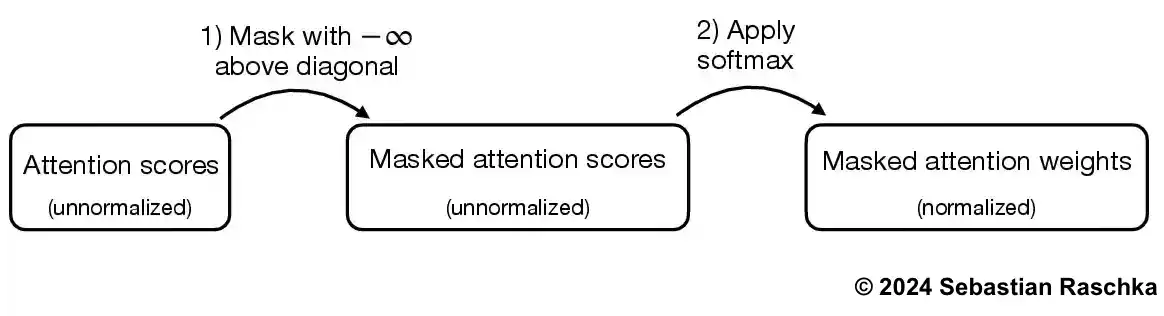

In [ ]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


As we can see below, now the attention weights in each row correctly sum to 1 again:

- -inf mean -9999 which is equal to 0 we can check
torch.exp(torch.tensor(-9999))

In [ ]:
torch.exp(torch.tensor(-9999))

tensor(0.)

In [ ]:
# Applying softmax
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


## Masking additional attention weights with dropout

In addition, we also apply dropout to reduce overfitting during training

Dropout can be applied in several places:

for example, after computing the attention weights;
or after multiplying the attention weights with the value vectors
Here, we will apply the dropout mask after computing the attention weights because it's more common

Furthermore, in this specific example, we use a dropout rate of 50%, which means randomly masking out half of the attention weights.
(When we train the GPT model later, we will use a lower dropout rate, such as 0.1 or 0.2.
If we apply a dropout rate of 0.5 (50%), the non-dropped values will be scaled accordingly by a factor of 1/0.5 = 2
The scaling is calculated by the formula 1 / (1 - dropout_rate)

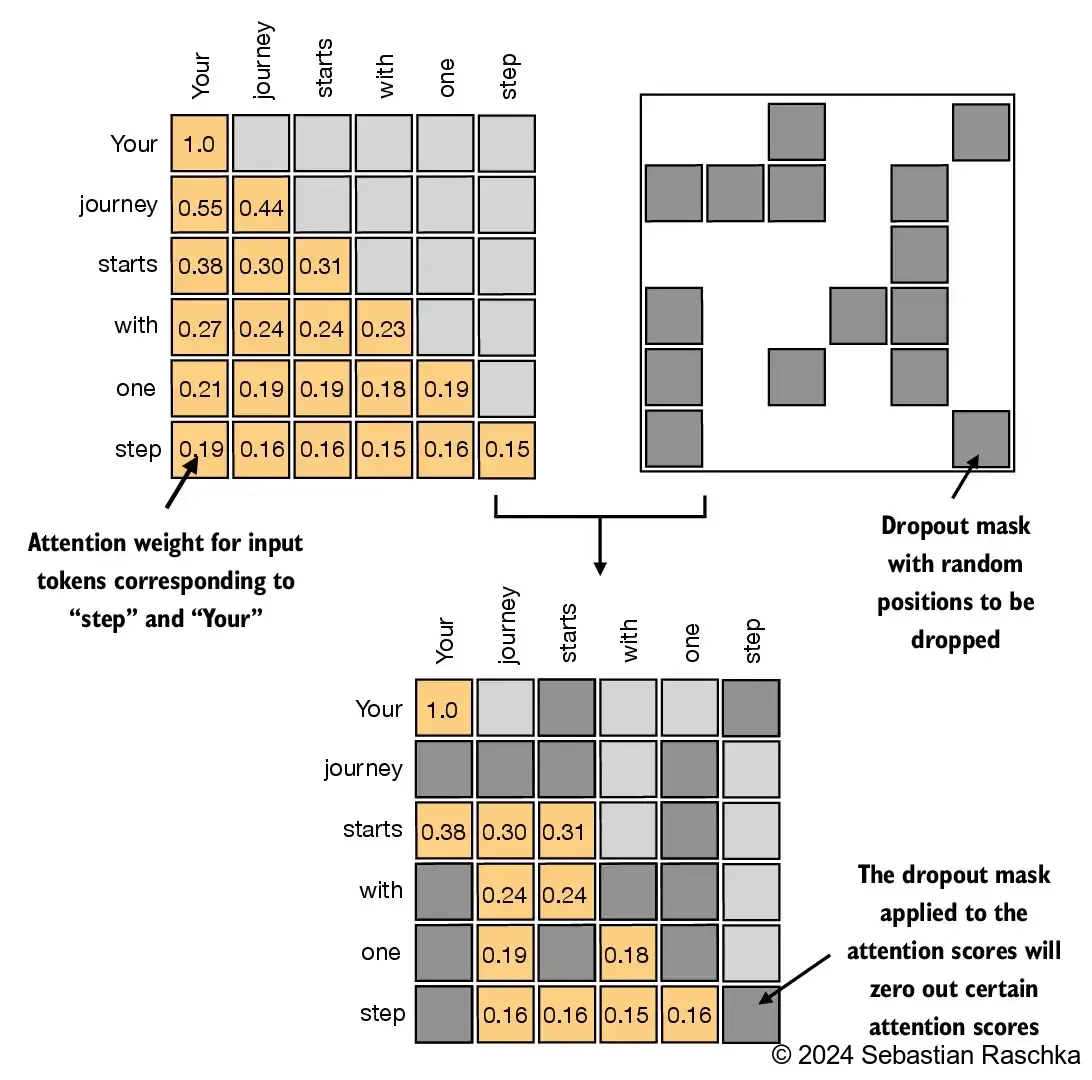

- `we apply dropout mask to reduce overfitting and also so that over model donot rely on position`

- Also it is not use too much for LLM

In [ ]:
#example to show how dropout work
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) # dropout rate of 50%
example = torch.ones(6, 6) # create a matrix of ones

print(dropout(example))


tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [ ]:
# Applying dropout to attention weights
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


## 3.5.3 Implementing a compact causal self-attention class
Now, we are ready to implement a working implementation of self-attention, including the causal and dropout masks
One more thing is to implement the code to handle batches consisting of more than one input so that our CausalAttention class supports the batch outputs produced by the data loader we implemented in chapter 2
For simplicity, to simulate such batch input, we duplicate the input text example:

In [5]:
# creating batch using stack to stack inputs
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) # 2 inputs with 6 tokens each, and each token has embedding dimension 3

torch.Size([2, 6, 3])


In [18]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length,
                 dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # Using register_buffer ensures the mask tensor moves with the model to GPU (e.g. via .cuda()),
                                                                                                        # even though it's not a learnable parameter like weights.



    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        # For inputs where `num_tokens` exceeds `context_length`, this will result in errors
        # in the mask creation further below.
        # In practice, this is not a problem since the LLM (chapters 4-7) ensures that inputs
        # do not exceed `context_length` before reaching this forward method.
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

torch.manual_seed(123)

context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)

context_vecs = ca(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


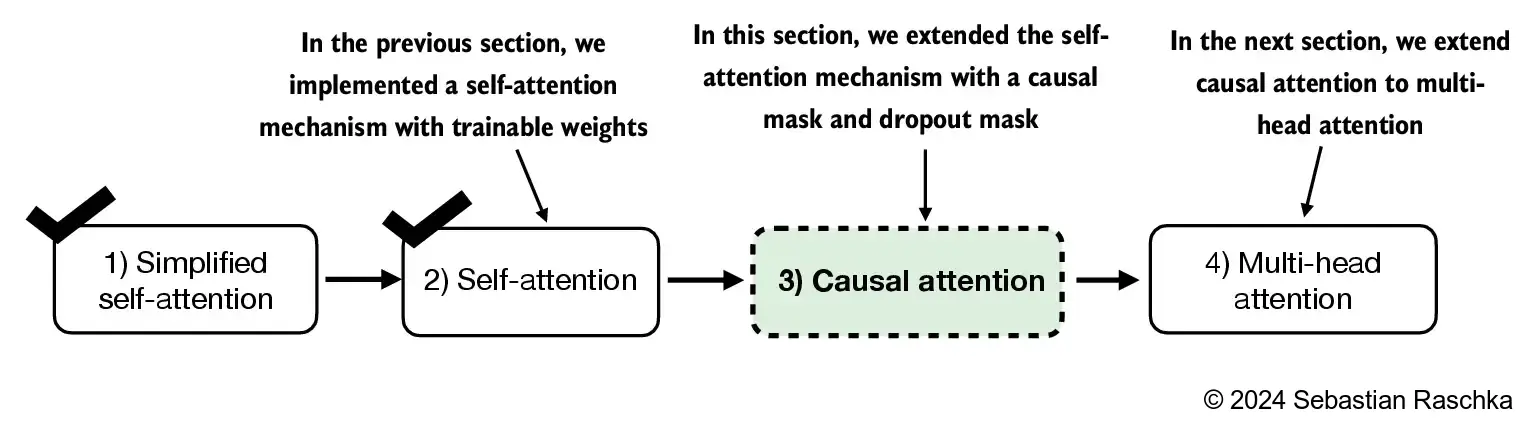

# 3.6 Extending single-head attention to multi-head attention

### 3.6.1 Stacking multiple single-head attention layers

#### Single-head attention

image.png

### MULTI-HEAD ATTENTION

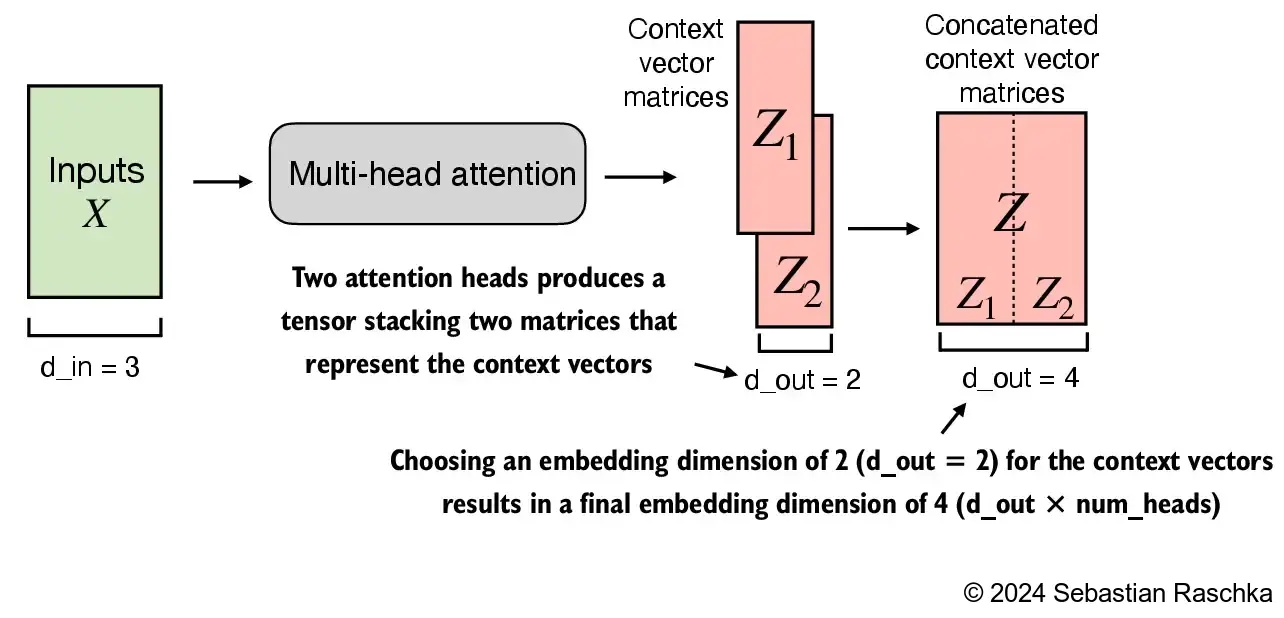

The main idea behind multi-head attention is to run the attention mechanism multiple times (in parallel) with different, learned linear projections.

This allows the model to jointly attend to information from different representation subspaces at different positions.

-----

> In order to build multi-head attention we use `multi-head attention wrapper`

> specify the `num_heads`

> num_head specify the no. of context vector we want if num_heads=2 then we get 2 set of context vectors metrices.

> In each context vector the no.of rows represent the context vector correspond to the tokens. columns correspond to the embedding dimensionspeicfy as d_out=4

> At last we concatenate these context vector metrices along the column dimension.

> since we have 2 num_heads with and an embedding dimension of 2 so the final embedding dimension will be 2*2 = 4.

In [3]:
import torch.nn as nn


In [19]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


torch.manual_seed(123)

context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


### 3.6.2 Implementing multi-head attention with weight splits

While the above is an intuitive and fully functional implementation of multi-head attention (wrapping the single-head attention CausalAttention implementation from earlier), we can write a stand-alone class called MultiHeadAttention to achieve the same

We don't concatenate single attention heads for this stand-alone MultiHeadAttention class

Instead, we create single W_query, W_key, and W_value weight matrices and then split those into individual matrices for each attention head:

In [20]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        # As in `CausalAttention`, for inputs where `num_tokens` exceeds `context_length`,
        # this will result in errors in the mask creation further below.
        # In practice, this is not a problem since the LLM (chapters 4-7) ensures that inputs
        # do not exceed `context_length` before reaching this forwar

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


**Note that the above is essentially a rewritten version of MultiHeadAttentionWrapper that is more efficient**

The resulting output looks a bit different since the random weight initializations differ, but both are fully functional implementations that can be used in the GPT class we will implement in the upcoming chapters.

Note that in addition, we added a linear projection layer (self.out_proj ) to the MultiHeadAttention class above. This is simply a linear transformation that doesn't change the dimensions.

It's a standard convention to use such a projection layer in LLM implementation, but it's not strictly necessary (recent research has shown that it can be removed without affecting the modeling performance; see the further reading section at the end of this chapter)

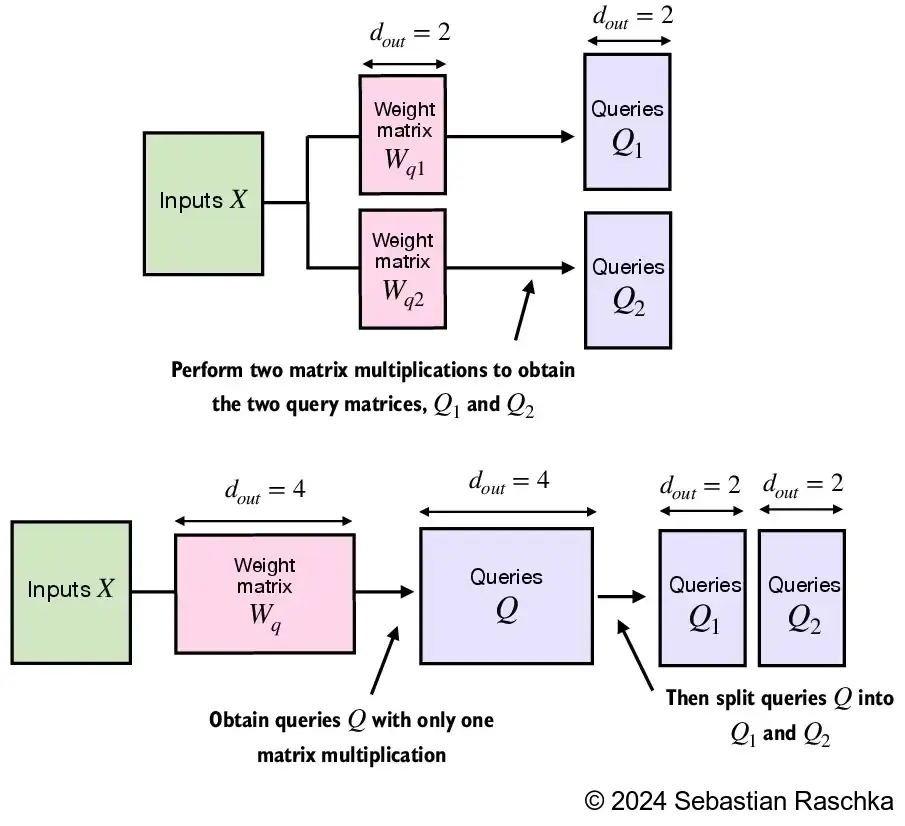

Note that if you are interested in a compact and efficient implementation of the above, you can also consider the torch.nn.MultiheadAttention class in PyTorch

Since the above implementation may look a bit complex at first glance, let's look at what happens when executing attn_scores = queries @ keys.transpose(2, 3)

In [21]:
# (b, num_heads, num_tokens, head_dim) = (1, 2, 3, 4)
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],

                   [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])

print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In this case, the matrix multiplication implementation in PyTorch will handle the 4-dimensional input tensor so that the matrix multiplication is carried out between the 2 last dimensions (num_tokens, head_dim) and then repeated for the individual heads

For instance, the following becomes a more compact way to compute the matrix multiplication for each head separately

In [22]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)

second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])
